In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from tqdm import tqdm
import glob

In [2]:
def compute_cdf(path,dt = 10):
    df = pd.read_csv(path)
    df = df[df.channel == 'w1']
    df.tamsd = df.tamsd*(0.16) # from pixel to µm
    df.lags = df.lags*dt # from frame to seconds
    df.tamsd = df.tamsd - (2*(0.035**2)) # subtract the localization error
    df.rename(columns={'tamsd':'MSD(µm^2)','lags':'lags(s)'}, inplace=True)

    max_s = []
    for i in df.track_id.unique():
        max_s.append(df[df.track_id == i]['lags(s)'].max())
    
    counts,bins = np.histogram(max_s,bins=181)
    cdf = np.cumsum(counts / sum(counts))
    return bins[1:],1-cdf

In [13]:
list_files = glob.glob('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/*/msd_corrected_*')
list_files.append('/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/fixed/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_uncorrected__20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv')
list_files 

['/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20220907_Rad21-Halo_SPT_2D5_Sororin_noaux_40mW_2/msd_corrected__20220907_Rad21-Halo_SPT_2D5_Sororin_noaux_40mW_2.csv',
 '/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230605_Rad21-Halo_G6_2_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230605_Rad21-Halo_G6_2_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv',
 '/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230531_Rad21-Halo_sororin_2D5_0h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230531_Rad21-Halo_sororin_2D5_0h_2_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv',
 '/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230529_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB/msd_corrected__20230529_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mCherryGFPWithSMB.csv',
 '/tungstenfs/scratch/ggiorget/nessim/cohesin_live_cell_analysis/results/20230526_Rad21-Halo_NIPBL_1C5_6h_1_FullseqTIRF-Cy5-mChe

In [32]:
import re

# Define the input string
input_string = list_files[3]

# Define the regular expression pattern to match the desired string
pattern = r'_(\w+-\w+)_'

files_names = [re.search(pattern, input_string).group(1) for input_string in list_files]
files_names

['Rad21-Halo_SPT_2D5_Sororin_noaux_40mW',
 'Rad21-Halo_G6_2',
 'Rad21-Halo_sororin_2D5_0h_2',
 'Rad21-Halo_NIPBL_1C5_6h_1',
 'Rad21-Halo_NIPBL_1C5_6h_1',
 'Rad21-Halo_Sororin_2D5_0h_2',
 'Rad21-Halo_NIPBL_1C5_0h_1',
 'Rad21-Halo_sororin_2D5_3h_2',
 'Rad21-Halo_Sororin_2D5_0h_1',
 'Rad21-Halo_NIPBL_1C5_0h_3',
 'Rad21-Halo_NIPBL_1C5_0h_1',
 'Rad21-Halo_sororin_2D5_0h_1',
 'Rad21-Halo_NIPBL_1C5_6h',
 'Rad21-Halo_NIPBL_1C5_0h_2',
 'Rad21-Halo_G6_1',
 'Rad21-Halo_sororin_2D5_3h_1',
 'Rad21-Halo_NIPBL_1C5_6h_2',
 'Rad21-Halo_sororin_2D5_3h_3',
 'Rad21-Halo_G6_3',
 'Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4']

In [15]:
bins, cdf = zip(*map(compute_cdf,list_files))

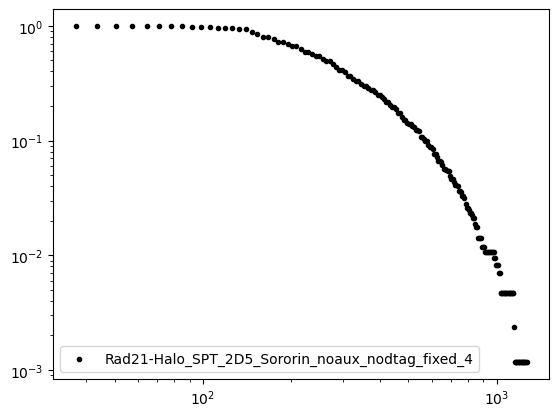

In [42]:
for b,c,lab in zip(bins,cdf,files_names):
    if lab == 'Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4':
        plt.scatter(b[:-1],c[:-1],marker='.',label=lab,color='black')
        plt.yscale('log')
        plt.xscale('log')
        plt.legend()
    else:
        continue
        plt.scatter(b[:-1],c[:-1],marker='.',label=lab)
        plt.yscale('log')
        plt.xscale('log')

        plt.legend(bbox_to_anchor=(1.05, 1.05))

In [43]:
glob.glob('/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/*.tif')

['/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_3_FullseqTIRF-Cy5-mCherryGFPWithSMB_w2.tif',
 '/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB_w2.tif',
 '/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif',
 '/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_3_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif',
 '/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_2_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif',
 '/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixe

In [46]:

# Define the file path pattern
file_path_pattern = '/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/*.tif'

# Use glob.glob to find all files that match the pattern
file_paths = glob.glob(file_path_pattern)

# Use a list comprehension and os.path.basename to extract just the filename (including the extension) from each file path
file_names = [os.path.basename(file_path) for file_path in file_paths]

# Print the list of file names
print(file_names)

['20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_3_FullseqTIRF-Cy5-mCherryGFPWithSMB_w2.tif', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB_w2.tif', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_3_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_2_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_1_FullseqTIRF-Cy5-mCherryGFPWithSMB_w2.tif', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_1_FullseqTIRF-Cy5-mCherryGFPWithSMB_w1.tif', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_2_FullseqTIRF-Cy5-mCherryGFPWithSMB_w2.tif']


In [48]:
# Define the file path pattern
file_path_pattern = '/tungstenfs/scratch/ggiorget/Pia/microscopy/Rad21-Halo/20231026/fixed/tiff/denoised/*.tif'

# Use glob.glob to find all files that match the pattern
file_paths = glob.glob(file_path_pattern)

# Use a list comprehension and os.path.basename to extract just the filename (including the extension) from each file path
file_names = [os.path.basename(file_path) for file_path in file_paths]

# Use another list comprehension and str.replace to remove the _w1 or _w2 suffix from each file name
file_names = [file_name.replace('_w1', '').replace('_w2', '').replace('.tif','') for file_name in file_names]

# Print the list of modified file names
print(file_names)

['20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_3_FullseqTIRF-Cy5-mCherryGFPWithSMB', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_4_FullseqTIRF-Cy5-mCherryGFPWithSMB', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_3_FullseqTIRF-Cy5-mCherryGFPWithSMB', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_2_FullseqTIRF-Cy5-mCherryGFPWithSMB', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_1_FullseqTIRF-Cy5-mCherryGFPWithSMB', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_1_FullseqTIRF-Cy5-mCherryGFPWithSMB', '20231026_Rad21-Halo_SPT_2D5_Sororin_noaux_nodtag_fixed_2_FullseqTIRF-Cy5-mCherryGFPWithSMB']
